In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:

#importing major files

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report



# Desabilitar warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
#Creat dataframe from location:
df_org = pd.read_csv("healthcare_dataset.csv")

In [4]:
#Call heads 
df_org.head(10)

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal
5,EMILY JOHNSOn,36,Male,A+,Asthma,2023-12-20,Taylor Newton,Nunez-Humphrey,UnitedHealthcare,48145.110951,389,Urgent,2023-12-24,Ibuprofen,Normal
6,edwArD EDWaRDs,21,Female,AB-,Diabetes,2020-11-03,Kelly Olson,Group Middleton,Medicare,19580.872345,389,Emergency,2020-11-15,Paracetamol,Inconclusive
7,CHrisTInA MARtinez,20,Female,A+,Cancer,2021-12-28,Suzanne Thomas,"Powell Robinson and Valdez,",Cigna,45820.462722,277,Emergency,2022-01-07,Paracetamol,Inconclusive
8,JASmINe aGuIlaR,82,Male,AB+,Asthma,2020-07-01,Daniel Ferguson,Sons Rich and,Cigna,50119.222792,316,Elective,2020-07-14,Aspirin,Abnormal
9,ChRISTopher BerG,58,Female,AB-,Cancer,2021-05-23,Heather Day,Padilla-Walker,UnitedHealthcare,19784.631062,249,Elective,2021-06-22,Paracetamol,Inconclusive


In [7]:
# Loop for identify all unique values
df = df_org
for i in df.columns:
    # Skip variables 'data' and 'place'
    if i in ['Name', 'Age', 'Doctor','Billing Amount','Room Number','Date of Admission','Discharge Date']:
        continue
    unique_values = df[i].unique()
    print(f"Unique values in column '{i}': {unique_values}")

Unique values in column 'Gender': ['Male' 'Female']
Unique values in column 'Blood Type': ['B-' 'A+' 'A-' 'O+' 'AB+' 'AB-' 'B+' 'O-']
Unique values in column 'Medical Condition': ['Cancer' 'Obesity' 'Diabetes' 'Asthma' 'Hypertension' 'Arthritis']
Unique values in column 'Hospital': ['Sons and Miller' 'Kim Inc' 'Cook PLC' ... 'Guzman Jones and Graves,'
 'and Williams, Brown Mckenzie' 'Moreno Murphy, Griffith and']
Unique values in column 'Insurance Provider': ['Blue Cross' 'Medicare' 'Aetna' 'UnitedHealthcare' 'Cigna']
Unique values in column 'Admission Type': ['Urgent' 'Emergency' 'Elective']
Unique values in column 'Medication': ['Paracetamol' 'Ibuprofen' 'Aspirin' 'Penicillin' 'Lipitor']
Unique values in column 'Test Results': ['Normal' 'Inconclusive' 'Abnormal']


In [8]:
## 1st stage Basic data type cleaning and selection based on the above observations
# Name -> drop
# Age -> need
# Gender -> need
# Blood Type -> need
# Medical Condition -> unique
# Date of Admission -> Change Data Type
# Doctor -> irrelevant need to drop
# Hospital -> May be irrelevant 
# Insurance Provider -> may be irrelevant
# Billing Amount -> Dependent variable
# Room Number -> irrelevant drop
# Admission Type -> Unique
# Discharge Date -> Change to date and add one new variable 
# Medication -> relevant
# Test Results -> relevant

In [9]:
#1. Drop Name, Doctor, and Room Number

# Specify columns to drop as a tuple
drop_list = ['Name', 'Doctor', 'Room Number']

# Drop columns from the DataFrame using the tuple
df = df.drop(drop_list, axis=1)
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 55500 non-null  int64  
 1   Gender              55500 non-null  object 
 2   Blood Type          55500 non-null  object 
 3   Medical Condition   55500 non-null  object 
 4   Date of Admission   55500 non-null  object 
 5   Hospital            55500 non-null  object 
 6   Insurance Provider  55500 non-null  object 
 7   Billing Amount      55500 non-null  float64
 8   Admission Type      55500 non-null  object 
 9   Discharge Date      55500 non-null  object 
 10  Medication          55500 non-null  object 
 11  Test Results        55500 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 5.1+ MB


In [10]:
#Change object to date type Date of Admission and Discharge Date

df['Date of Admission'] = pd.to_datetime(df['Date of Admission'])
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'])

In [11]:
df['Date of Admission'].info()
df['Discharge Date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 55500 entries, 0 to 55499
Series name: Date of Admission
Non-Null Count  Dtype         
--------------  -----         
55500 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 433.7 KB
<class 'pandas.core.series.Series'>
RangeIndex: 55500 entries, 0 to 55499
Series name: Discharge Date
Non-Null Count  Dtype         
--------------  -----         
55500 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 433.7 KB


In [12]:
# Grpah plot
import matplotlib.pyplot as plt
# Import Seaborn
import seaborn as sns

In [13]:
# New variable no of says admited
df["admited_days"] = (df['Discharge Date']-df['Date of Admission']).dt.days
df['admited_days'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 55500 entries, 0 to 55499
Series name: admited_days
Non-Null Count  Dtype
--------------  -----
55500 non-null  int64
dtypes: int64(1)
memory usage: 433.7 KB


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Age                 55500 non-null  int64         
 1   Gender              55500 non-null  object        
 2   Blood Type          55500 non-null  object        
 3   Medical Condition   55500 non-null  object        
 4   Date of Admission   55500 non-null  datetime64[ns]
 5   Hospital            55500 non-null  object        
 6   Insurance Provider  55500 non-null  object        
 7   Billing Amount      55500 non-null  float64       
 8   Admission Type      55500 non-null  object        
 9   Discharge Date      55500 non-null  datetime64[ns]
 10  Medication          55500 non-null  object        
 11  Test Results        55500 non-null  object        
 12  admited_days        55500 non-null  int64         
dtypes: datetime64[ns](2), float64(1), int64(2), ob

In [15]:
# drop hospital, date of admission and discharge date:
drop_list2 = ['Date of Admission','Discharge Date','Hospital']
df= df.drop(drop_list2, axis=1)

In [16]:
## Model building
df['temp'] = df.iloc[:, 0]  # Store the values of the first column in a temporary column
df.iloc[:,0] = df.iloc[:, 5]  # Replace the values of the first column with the values of the second column
df.iloc[:,5] = df.iloc[:,10]  # Replace the values of the second column with the values stored in the temporary column
df = df.drop('temp', axis=1)  # Drop the temporary column

In [17]:
# remane Col
df = df.rename(columns={'Age': 'Billing_Amount',
                        'Billing Amount':'Age'})

In [18]:
#change data type flot to int
df['Billing_Amount'].astype(int)

0        18856
1        33643
2        27955
3        37909
4        14238
         ...  
55495     2650
55496    31457
55497    27620
55498    32451
55499     4010
Name: Billing_Amount, Length: 55500, dtype: int64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Billing_Amount      55500 non-null  float64
 1   Gender              55500 non-null  object 
 2   Blood Type          55500 non-null  object 
 3   Medical Condition   55500 non-null  object 
 4   Insurance Provider  55500 non-null  object 
 5   Age                 55500 non-null  float64
 6   Admission Type      55500 non-null  object 
 7   Medication          55500 non-null  object 
 8   Test Results        55500 non-null  object 
 9   admited_days        55500 non-null  int64  
dtypes: float64(2), int64(1), object(7)
memory usage: 4.2+ MB


In [20]:
# Now creating dummy variables for 
df_final = pd.get_dummies(df,drop_first=True)

In [21]:
df_final.head()

,Billing_Amount,Age,admited_days,Gender_Male,Blood Type_A-,Blood Type_AB+,Blood Type_AB-,Blood Type_B+,Blood Type_B-,Blood Type_O+,...,Insurance Provider_Medicare,Insurance Provider_UnitedHealthcare,Admission Type_Emergency,Admission Type_Urgent,Medication_Ibuprofen,Medication_Lipitor,Medication_Paracetamol,Medication_Penicillin,Test Results_Inconclusive,Test Results_Normal
0,18856.281306,30.0,2,True,False,False,False,False,True,False,...,False,False,False,True,False,False,True,False,False,True
1,33643.327287,62.0,6,True,False,False,False,False,False,False,...,True,False,True,False,True,False,False,False,True,False
2,27955.096079,76.0,15,False,True,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True
3,37909.782410,28.0,30,False,False,False,False,False,False,True,...,True,False,False,False,True,False,False,False,False,False
4,14238.317814,43.0,20,False,False,True,False,False,False,False,...,False,False,False,True,False,False,False,True,False,False


In [22]:
# List of all Variables
df_final.columns

Index(['Billing_Amount', 'Age', 'admited_days', 'Gender_Male', 'Blood Type_A-',
       'Blood Type_AB+', 'Blood Type_AB-', 'Blood Type_B+', 'Blood Type_B-',
       'Blood Type_O+', 'Blood Type_O-', 'Medical Condition_Asthma',
       'Medical Condition_Cancer', 'Medical Condition_Diabetes',
       'Medical Condition_Hypertension', 'Medical Condition_Obesity',
       'Insurance Provider_Blue Cross', 'Insurance Provider_Cigna',
       'Insurance Provider_Medicare', 'Insurance Provider_UnitedHealthcare',
       'Admission Type_Emergency', 'Admission Type_Urgent',
       'Medication_Ibuprofen', 'Medication_Lipitor', 'Medication_Paracetamol',
       'Medication_Penicillin', 'Test Results_Inconclusive',
       'Test Results_Normal'],
      dtype='object')

In [23]:
# Correlation values
df_final.corr()

,Billing_Amount,Age,admited_days,Gender_Male,Blood Type_A-,Blood Type_AB+,Blood Type_AB-,Blood Type_B+,Blood Type_B-,Blood Type_O+,...,Insurance Provider_Medicare,Insurance Provider_UnitedHealthcare,Admission Type_Emergency,Admission Type_Urgent,Medication_Ibuprofen,Medication_Lipitor,Medication_Paracetamol,Medication_Penicillin,Test Results_Inconclusive,Test Results_Normal
Billing_Amount,1.000000,-0.003832,-0.005602,0.004827,0.001485,-0.004734,0.004141,-0.002917,-0.000396,-0.007689,...,0.002706,-0.005290,-0.002066,-0.001096,0.006916,-0.006941,-0.000205,-0.001700,0.004174,-0.004116
Age,-0.003832,1.000000,0.008220,-0.002002,-0.001469,-0.000802,-0.000732,0.006166,-0.005029,0.000642,...,-0.003755,-0.001177,0.000502,0.003894,0.001163,-0.006982,0.000825,-0.002617,0.004964,-0.008092
admited_days,-0.005602,0.008220,1.000000,0.003836,-0.002545,0.005376,-0.001673,0.008653,0.000852,-0.011388,...,0.007184,-0.003101,0.006960,-0.008274,-0.002571,-0.001747,0.000264,0.002532,-0.003221,0.003176
Gender_Male,0.004827,-0.002002,0.003836,1.000000,0.003533,0.003539,0.000925,0.010074,0.000871,-0.000926,...,-0.000254,0.000512,-0.009003,0.013132,-0.003088,0.001276,0.008902,0.000109,-0.003519,0.005999
Blood Type_A-,0.001485,-0.001469,-0.002545,0.003533,1.000000,-0.143340,-0.143316,-0.143316,-0.143304,-0.142986,...,-0.004964,-0.008277,-0.002892,0.002933,-0.003693,0.000431,0.005013,-0.007047,-0.000800,0.001138
Blood Type_AB+,-0.004734,-0.000802,0.005376,0.003539,-0.143340,1.000000,-0.143057,-0.143057,-0.143045,-0.142727,...,0.003647,0.010673,0.000840,0.003441,0.000166,0.001032,-0.001876,0.006351,0.003166,-0.000438
Blood Type_AB-,0.004141,-0.000732,-0.001673,0.000925,-0.143316,-0.143057,1.000000,-0.143034,-0.143022,-0.142704,...,-0.000103,0.000799,-0.002213,-0.003636,-0.003724,-0.004351,0.002402,0.009541,-0.005438,0.005182
Blood Type_B+,-0.002917,0.006166,0.008653,0.010074,-0.143316,-0.143057,-0.143034,1.000000,-0.143022,-0.142704,...,-0.008664,0.007736,0.008217,0.002018,-0.002636,0.007613,-0.003866,0.001091,0.007989,-0.004750
Blood Type_B-,-0.000396,-0.005029,0.000852,0.000871,-0.143304,-0.143045,-0.143022,-0.143022,1.000000,-0.142692,...,0.009709,-0.008424,-0.002291,0.003211,0.002016,-0.001605,-0.005475,0.001663,-0.003316,0.001294
Blood Type_O+,-0.007689,0.000642,-0.011388,-0.000926,-0.142986,-0.142727,-0.142704,-0.142704,-0.142692,1.000000,...,-0.004646,0.000475,0.002568,-0.003484,0.005073,-0.001414,0.005899,-0.008111,-0.002982,0.000025


In [24]:
# For Correlatation import Matplotlib.
import matplotlib.pyplot as plt
%matplotlib inline

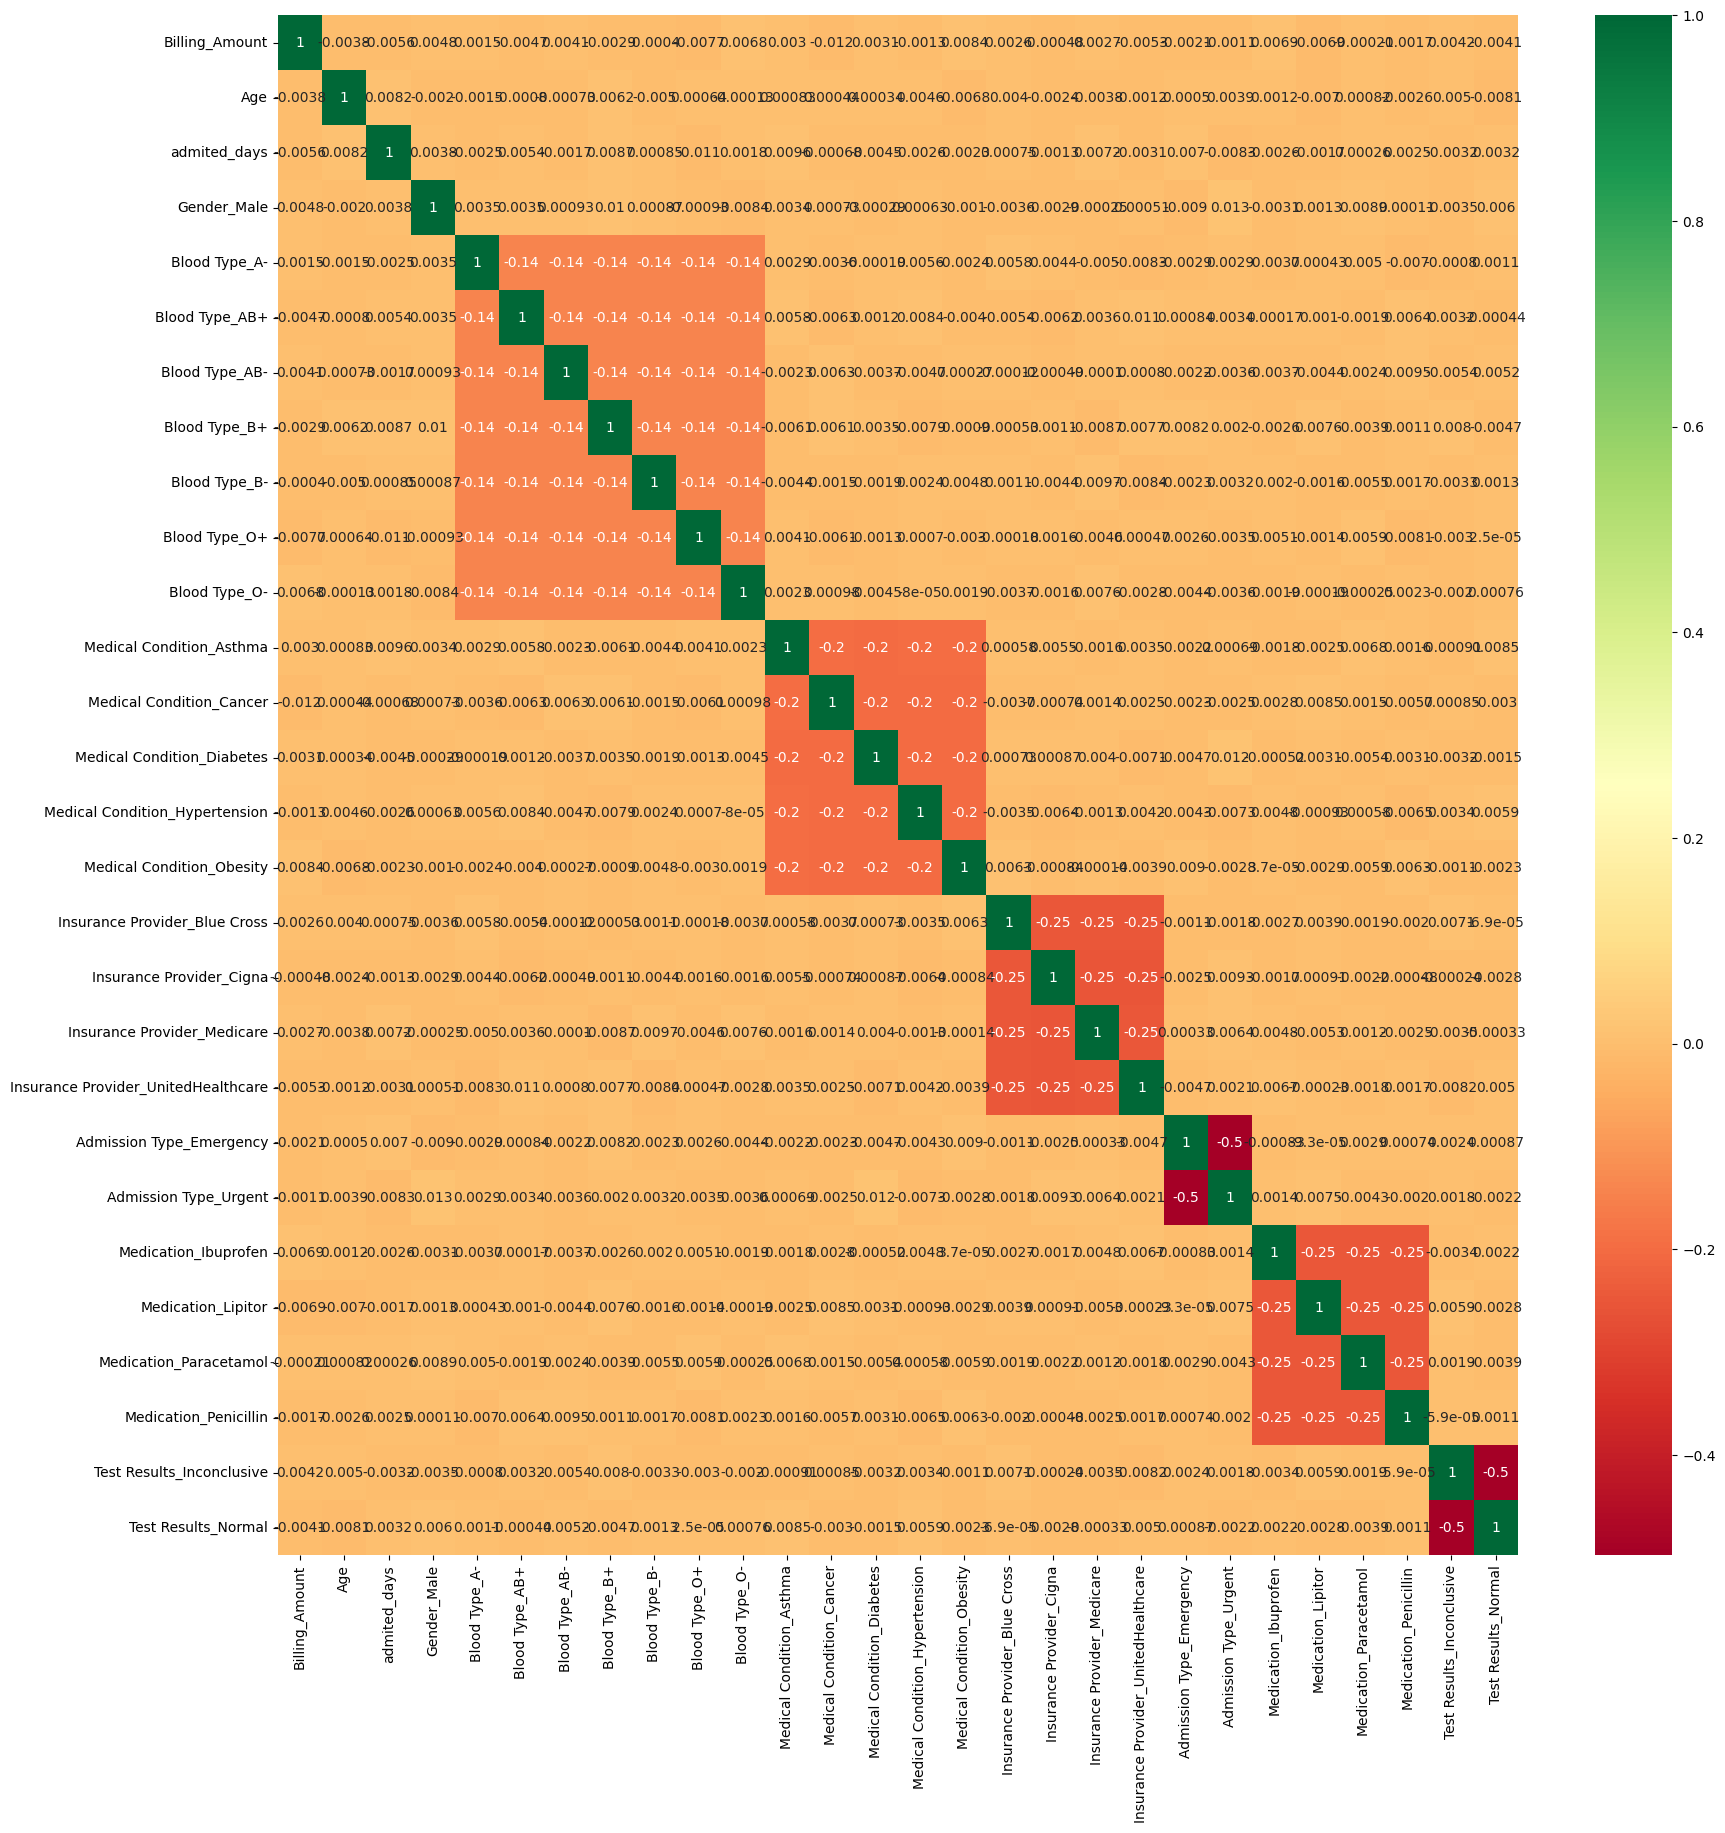

In [25]:
# Check correlation b/w variables
cor_mat=df_final.corr()
top_cor_features=cor_mat.index
plt.figure(figsize=(20,20))

# heatmap
g= sns.heatmap(df_final[top_cor_features].corr(), annot=True, cmap="RdYlGn")

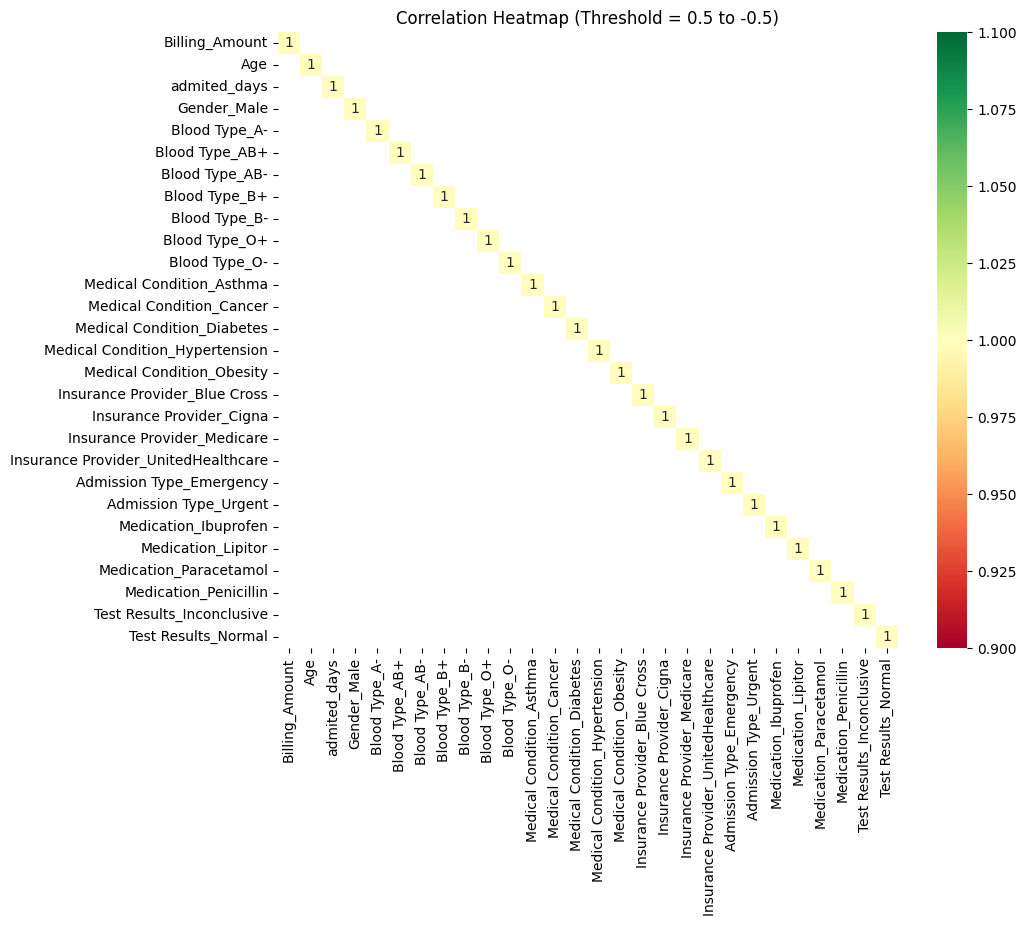

In [26]:
# Check correlation b/w variables only for corr above 0.5
#cor_mat=df_final.corr()
# Filter correlations above threshold
threshold_max = 0.5
threshold_min = -0.5
high_correlation = cor_mat[(cor_mat > threshold_max) | (cor_mat<threshold_min)]

# Create heatmap
plt.figure(figsize=(10, 8))
g = sns.heatmap(high_correlation, annot=True, cmap="RdYlGn")
plt.title(f"Correlation Heatmap (Threshold = {threshold_max} to {threshold_min})")
plt.show()

In [27]:
# From above no independent variable looks correlated with each other

In [28]:
df_final

,Billing_Amount,Age,admited_days,Gender_Male,Blood Type_A-,Blood Type_AB+,Blood Type_AB-,Blood Type_B+,Blood Type_B-,Blood Type_O+,...,Insurance Provider_Medicare,Insurance Provider_UnitedHealthcare,Admission Type_Emergency,Admission Type_Urgent,Medication_Ibuprofen,Medication_Lipitor,Medication_Paracetamol,Medication_Penicillin,Test Results_Inconclusive,Test Results_Normal
0,18856.281306,30.0,2,True,False,False,False,False,True,False,...,False,False,False,True,False,False,True,False,False,True
1,33643.327287,62.0,6,True,False,False,False,False,False,False,...,True,False,True,False,True,False,False,False,True,False
2,27955.096079,76.0,15,False,True,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True
3,37909.782410,28.0,30,False,False,False,False,False,False,True,...,True,False,False,False,True,False,False,False,False,False
4,14238.317814,43.0,20,False,False,True,False,False,False,False,...,False,False,False,True,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55495,2650.714952,42.0,30,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
55496,31457.797307,61.0,9,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
55497,27620.764717,38.0,28,False,False,False,False,True,False,False,...,False,True,False,True,True,False,False,False,False,False
55498,32451.092358,43.0,6,True,False,False,False,False,False,False,...,True,False,False,False,True,False,False,False,False,False


In [29]:
# import min max scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_final[['Age', 'admited_days']] = scaler.fit_transform(df_final[['Age', 'admited_days']])

In [30]:
df_final.replace(True,1,inplace=True)
df_final.replace(False,0,inplace=True)

In [31]:
df_final.to_csv('clean_health_data.csv', index=False)

In [75]:
#definding my all independent variables
X= df_final.iloc[:,1:]

In [76]:
#definding my all Dependent variables
y= df_final.iloc[:,0]

In [77]:
X.replace(True,1,inplace=True)
X.replace(False,0,inplace=True)

In [101]:
X

,Age,admited_days,Gender_Male,Blood Type_A-,Blood Type_AB+,Blood Type_AB-,Blood Type_B+,Blood Type_B-,Blood Type_O+,Blood Type_O-,...,Insurance Provider_Medicare,Insurance Provider_UnitedHealthcare,Admission Type_Emergency,Admission Type_Urgent,Medication_Ibuprofen,Medication_Lipitor,Medication_Paracetamol,Medication_Penicillin,Test Results_Inconclusive,Test Results_Normal
0,30.0,2,1,0,0,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,1
1,62.0,6,1,0,0,0,0,0,0,0,...,1,0,1,0,1,0,0,0,1,0
2,76.0,15,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,28.0,30,0,0,0,0,0,0,1,0,...,1,0,0,0,1,0,0,0,0,0
4,43.0,20,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55495,42.0,30,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
55496,61.0,9,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
55497,38.0,28,0,0,0,0,1,0,0,0,...,0,1,0,1,1,0,0,0,0,0
55498,43.0,6,1,0,0,0,0,0,0,1,...,1,0,0,0,1,0,0,0,0,0


In [79]:
# normalize column Age and admit_days to range 0 and 1
scaler = StandardScaler()
X[['Age', 'admited_days']] = scaler.fit_transform(X[['Age', 'admited_days']])

In [103]:
X

,Age,admited_days,Gender_Male,Blood Type_A-,Blood Type_AB+,Blood Type_AB-,Blood Type_B+,Blood Type_B-,Blood Type_O+,Blood Type_O-,...,Insurance Provider_Medicare,Insurance Provider_UnitedHealthcare,Admission Type_Emergency,Admission Type_Urgent,Medication_Ibuprofen,Medication_Lipitor,Medication_Paracetamol,Medication_Penicillin,Test Results_Inconclusive,Test Results_Normal
0,30.0,2,1,0,0,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,1
1,62.0,6,1,0,0,0,0,0,0,0,...,1,0,1,0,1,0,0,0,1,0
2,76.0,15,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,28.0,30,0,0,0,0,0,0,1,0,...,1,0,0,0,1,0,0,0,0,0
4,43.0,20,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55495,42.0,30,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
55496,61.0,9,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
55497,38.0,28,0,0,0,0,1,0,0,0,...,0,1,0,1,1,0,0,0,0,0
55498,43.0,6,1,0,0,0,0,0,0,1,...,1,0,0,0,1,0,0,0,0,0


In [ ]:
X.to_csv('clean_data.csv', index=False)

In [81]:
y

0        18856.281306
1        33643.327287
2        27955.096079
3        37909.782410
4        14238.317814
             ...     
55495     2650.714952
55496    31457.797307
55497    27620.764717
55498    32451.092358
55499     4010.134172
Name: Billing_Amount, Length: 55500, dtype: float64

In [82]:
##Importance of Features
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [83]:
print(model.feature_importances_)

[2.21818150e-01 2.24091241e-01 5.40074488e-02 2.05147536e-02
 2.15546055e-02 1.90397114e-02 2.01800891e-02 1.87814680e-02
 1.42854706e-02 4.01639950e-03 2.37616063e-02 1.40776214e-04
 2.04184336e-02 1.85700423e-02 2.17634962e-02 3.19293469e-02
 2.79585408e-02 3.10705993e-02 2.68953666e-02 3.61028025e-02
 3.46333159e-02 1.65272873e-02 2.34208108e-02 2.31147980e-02
 9.94369021e-03 2.48316477e-02 1.06281020e-02]


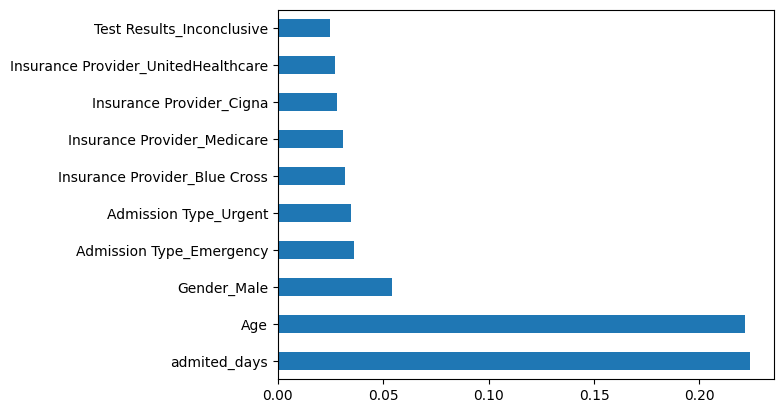

In [84]:
#plot graph of feature importance for better visualization

feat_importance = pd.Series(model.feature_importances_, index=X.columns)
feat_importance .nlargest(10).plot(kind='barh')  # can chnage (kind= 'bar') also
plt.show()

In [85]:
## Model building on features as above
# Calling test train Spl
from sklearn.model_selection import train_test_split

In [86]:
#identification
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [87]:
## Random forest regressor
from sklearn.ensemble import RandomForestRegressor

In [88]:
#for random hyper tuning parameter selection:
from sklearn.model_selection import RandomizedSearchCV
## Alternat search is import GridSearchCV

In [89]:
#import numpy as np
import numpy as np

In [90]:
#Hyperparameters
#a) estimators
n_estimators =  [int(x) for x in np.linspace(start =100, stop =1200, num = 12)]
#b max_features: number of features at every split = ['auto','sqrt']
max_features= ['auto','sqrt']
#c) Max numbers of levels-i.e. depth
max_depth = [int(x) for x in np.linspace(5,30, num=6)]
#d) Max_depth.append(None)
#e) Min number of samples required at split a node
min_samples_split = [2,5,10,15,100]
#f) Min number of samples required at each leaf node
min_samples_leaf = [1,2,5,10]

In [91]:
# Creat Random Grid
random_grid ={'n_estimators':n_estimators,
              'max_features':max_features,
              'max_depth':max_depth,
              'min_samples_split':min_samples_split,
              'min_samples_leaf':min_samples_leaf}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [92]:
# Define base model for hyper tuning
rf = RandomForestRegressor()

In [93]:
# Starting my randomized search for Hypertuning
rf_random =  RandomizedSearchCV(estimator= rf, param_distributions= random_grid, scoring= 'neg_mean_squared_error', n_iter =3, cv = 5, verbose=2, random_state = 42, n_jobs = 1)
#estimator = ML model Type
#cv = cross validation
# verbose = 2, help to show iter progress

In [94]:
# Linking Train data into model
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  12.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  11.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  11.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  11.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  11.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  20.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  20.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=3, n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [95]:
#Check for prediction on Test data set
predictions = rf_random.predict(X_test)

In [96]:
# Chec predection
print(predictions)

[26225.96065855 25386.36865631 25560.06640091 ... 25336.43117063
 26341.14034587 26441.52115489]


<Axes: xlabel='Billing_Amount', ylabel='Density'>

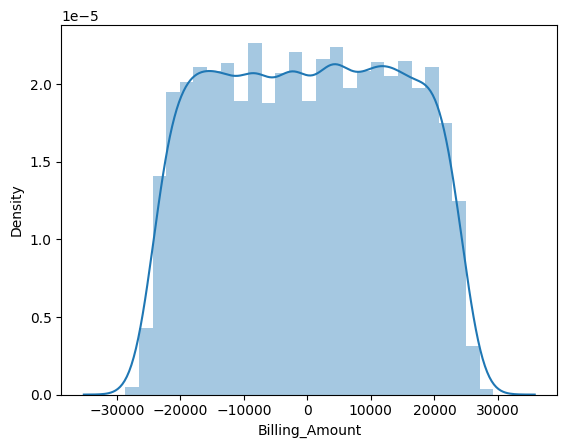

In [97]:
# Check the output of prediction by subtracting y_test and Prediction output from model
sns.distplot(y_test-predictions)

In [98]:
from sklearn.metrics import mean_squared_error

In [99]:
# 1st for RandomForest
# Calculate evaluation metrics
mse_rf = mean_squared_error(y_test, predictions)
#accuracy_rf = accuracy_score(y_test, predictions)
#recall_rf = recall_score(y_test, predictions)
#f1_rf = f1_score(y_test, predictions)

# Print evaluation metrics
print("Mean Squared Error-RF:", mse_rf)
#print("Accuracy-RF:", accuracy_rf)
#print("Recall-RF:", recall_rf)
#print("F1 Score-RF:", f1_rf)

Mean Squared Error-RF: 196315843.44280693


In [100]:
# 196421589.1818219